https://colab.research.google.com/drive/1JW2I6cU_ypfRXfIfqMPQwMEA6LzGav-Y#scrollTo=DvmxlZdJGITR

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score,train_test_split


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
data=pd.read_csv('bbc-text.csv',header='infer')

In [6]:
data.head(5)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [10]:
tfidf=TfidfVectorizer(sublinear_tf=True,norm='l2',stop_words='english',min_df=5)
encoder=LabelEncoder()

In [11]:
data['encoder_category']=encoder.fit_transform(data['category'])

In [12]:
data.head()

,category,text,encoder_category
0,tech,tv future in the hands of viewers with home th...,4
1,business,worldcom boss left books alone former worldc...,0
2,sport,tigers wary of farrell gamble leicester say ...,3
3,sport,yeading face newcastle in fa cup premiership s...,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,1


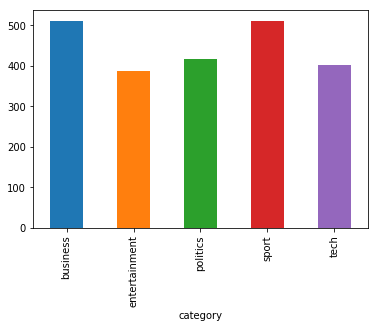

In [17]:
data.groupby('category')['category'].count().plot.bar(ylim=0)

In [18]:
features=tfidf.fit_transform(data['text'])
labels=data['encoder_category']

In [20]:
models=[
    RandomForestClassifier(n_estimators=200,random_state=0,max_depth=3),
    MultinomialNB(),
    LogisticRegression(random_state=0)    
]

In [22]:
CV=5
cv_df = pd.DataFrame()
entries = []
for model in models:
    model_name=model.__class__.__name__
    accuracies=cross_val_score(model,X=features,y=labels,scoring='accuracy',cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df=pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
    
    

In [28]:
cv_df.groupby('model_name')['accuracy'].mean()

model_name
LogisticRegression        0.977976
MultinomialNB             0.970339
RandomForestClassifier    0.846316
Name: accuracy, dtype: float64

In [35]:
X_train,X_test,y_train,y_test,indices_train, indices_test=train_test_split(features,labels,data.index, test_size=0.30, random_state=42)

In [31]:
model=LogisticRegression(random_state=0)

In [37]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
prediction=model.predict(X_test)

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)